In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import json

In [4]:
cd ../

C:\Users\mvill\Desktop\School\KaggleHackTheHuman_2022


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7682-30C3

 Directory of C:\Users\mvill\Desktop\School\KaggleHackTheHuman_2022

07/16/2022  17:13    <DIR>          .
07/16/2022  17:13    <DIR>          ..
07/12/2022  18:21             1,970 .gitignore
07/16/2022  17:15    <DIR>          data
07/12/2022  18:21            45,873 inference-fastai-baseline.ipynb
07/16/2022  19:43    <DIR>          ipynbs
07/12/2022  18:21               296 README.md
07/12/2022  18:21                21 sample_submission.csv
07/12/2022  18:21               111 test.csv
07/12/2022  18:21        16,367,208 train.csv
               6 File(s)     16,415,479 bytes
               4 Dir(s)  63,036,452,864 bytes free


In [13]:
def getTotalPixelCountAndMaskFromRLE(rle):
    first = rle.split()
    # first is just a string here
    totalPix = 0
    mask = []
    for i in range(0, len(first), 2):
        # print(first[i], first[i + 1])
        totalPix = totalPix + int(first[i + 1])
        mask.extend(np.arange(int(first[i]), int(first[i]) + int(first[i+1])))
    return int(totalPix), mask

In [47]:
first = plt.imread("data\\train_images\\351.tiff")
training = pd.read_csv("train.csv")
x = training[training["id"] == 351]
z = list(x["rle"])[0]

zz, mask = getTotalPixelCountAndMaskFromRLE(z)
negMask = np.zeros((3000,3000), dtype="uint8")

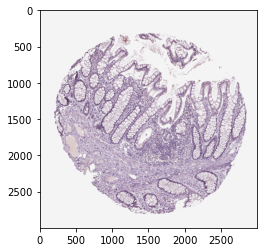

In [48]:
plt.imshow(first)

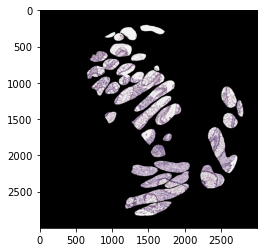

In [49]:
for pix in mask:
    row = int(pix/3000)
    col = pix%3000
    negMask[row][col] = 1

masked = cv2.bitwise_and(first, first, mask=negMask)
# show the output images
# cv2.imshow("Circular Mask", mask)
# cv2.imshow("Mask Applied to Image", masked)
plt.imshow(masked)